In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [23]:
data.shape

(400, 5)

In [24]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [25]:
final=data.drop(['User ID','Gender'],axis=1)
final.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
X=data[['Age','EstimatedSalary']]
y=data['Purchased']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
X_train.shape,X_test.shape

((280, 2), (120, 2))

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
knnpreds = knn_model.predict(X_test)

In [29]:
knnpreds

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0], dtype=int64)

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': knnpreds})
df

,Actual,Predicted
332,0,0
111,0,0
352,1,1
205,0,0
56,0,0
...,...,...
17,1,0
225,0,0
223,1,1
59,0,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

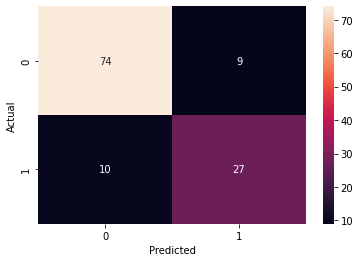

In [31]:
import seaborn as sn # plotting the data
confusion_matrix = pd.crosstab(y_test, knnpreds, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

Test set accuracy: 0.84
Test set auc: 0.81
Train set AUC :  0.8447191498590327


c:\users\sivashanmugavadivel\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


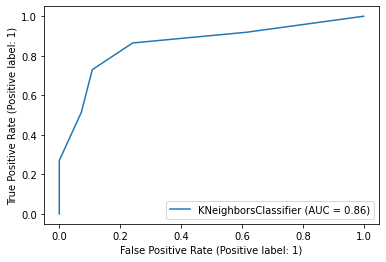

In [32]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = knn_model.predict(X_test) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(knn_model, X_test, y_test)


acc = roc_auc_score(y_train, knn_model.predict(X_train))
print("Train set AUC : ", acc)

In [33]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
    knn = KNeighborsClassifier(i) #initialising the model
    knn.fit(X_train,y_train) # training the model
    print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " test score : ", knn.score(X_test,y_test) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  :  1  train score :  1.0  test score :  0.7916666666666666  score :  0.7571428571428571
K value  :  2  train score :  0.875  test score :  0.8  score :  0.7678571428571429
K value  :  3  train score :  0.8928571428571429  test score :  0.8333333333333334  score :  0.7571428571428571
K value  :  4  train score :  0.8357142857142857  test score :  0.8166666666666667  score :  0.7642857142857142
K value  :  5  train score :  0.8642857142857143  test score :  0.8416666666666667  score :  0.8035714285714286
K value  :  6  train score :  0.8464285714285714  test score :  0.8333333333333334  score :  0.7642857142857143
K value  :  7  train score :  0.8428571428571429  test score :  0.8416666666666667  score :  0.7964285714285715
K value  :  8  train score :  0.8142857142857143  test score :  0.8333333333333334  score :  0.7785714285714286
K value  :  9  train score :  0.8285714285714286  test score :  0.85  score :  0.7821428571428571
K value  :  10  train score :  0.8107142857142857